# import

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from GaussianProcess.models import GPRegression
from GaussianProcess.kernel import RBF, Matern32, Matern52
from GaussianProcess.mean import Const

# create data

In [2]:
def sigmoid(x):
        return 1/(1+np.exp(-(x)))

x = np.linspace(-1,1,1000).reshape(-1,1)
f = 1.45*(sigmoid(x)*(2*np.sin(8*x) -2*np.cos(5*x)))
noise = 0.25*np.random.normal(size=f.shape)
y = f + noise
observed = np.random.choice(range(1000), 10, replace=False)

# set mean function and kernel function

In [3]:
kernel = (Matern32(variance=2.) + Matern52()) * RBF(lengthscale=1.5)
mean = Const(-2.)
gpr = GPRegression(mean, kernel, input_dim=1, noisevariance=1e-3)
print(gpr)

Model : Gaussian Process Regression
	input_dim : 1
	n_points  : 0

Mean function : Constant
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | constant               -2.000000   [   -10.000000,     10.000000]


Kernel function : (Matern32+Matern52)*RBF
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | variance                2.000000   [     0.100000,     10.000000]
  1 | lengthscale             1.000000   [     0.000100,     10.000000]
  2 | variance                1.000000   [     0.100000,     10.000000]
  3 | lengthscale             1.000000   [     0.000100,     10.000000]
  4 | variance                1.000000   [     0.100000,     10.000000]
  5 | lengthscale             1.500000   [     0.000100,     10.000000]


Noise : Gauss
No. | Parameter Name     Value           Range            

## change parameter value or range

In [4]:
gpr.mean.params[0].set_bound(-3,3)
gpr.kernel.params[3].set_value(2.71)
print(gpr)

Model : Gaussian Process Regression
	input_dim : 1
	n_points  : 0

Mean function : Constant
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | constant               -2.000000   [    -3.000000,      3.000000]


Kernel function : (Matern32+Matern52)*RBF
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | variance                2.000000   [     0.100000,     10.000000]
  1 | lengthscale             1.000000   [     0.000100,     10.000000]
  2 | variance                1.000000   [     0.100000,     10.000000]
  3 | lengthscale             2.710000   [     0.000100,     10.000000]
  4 | variance                1.000000   [     0.100000,     10.000000]
  5 | lengthscale             1.500000   [     0.000100,     10.000000]


Noise : Gauss
No. | Parameter Name     Value           Range            

# add observed points and optimize hyper parameters

In [5]:
gpr.add_points(x[observed], y[observed])
result = gpr.optimize()
print(gpr)

Model : Gaussian Process Regression
	input_dim : 1
	n_points  : 10

Mean function : Constant
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | constant               -3.000000   [    -3.000000,      3.000000]


Kernel function : (Matern32+Matern52)*RBF
No. | Parameter Name     Value           Range                        
-----------------------------------------------------------------------
  0 | variance                0.917925   [     0.100000,     10.000000]
  1 | lengthscale            10.000000   [     0.000100,     10.000000]
  2 | variance                0.299916   [     0.100000,     10.000000]
  3 | lengthscale            10.000000   [     0.000100,     10.000000]
  4 | variance                0.728291   [     0.100000,     10.000000]
  5 | lengthscale             0.238256   [     0.000100,     10.000000]


Noise : Gauss
No. | Parameter Name     Value           Range           

# calculate posterior

In [6]:
mean, var = gpr.predict(x)

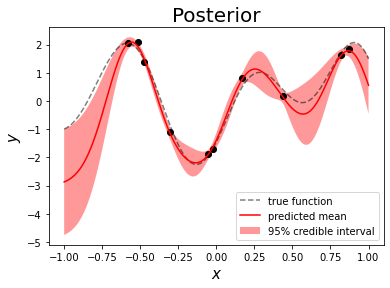

In [7]:
plt.title("Posterior",fontsize=20)
plt.plot(x[observed], y[observed], "o", color="k")
plt.plot(x,f,"--k",label="true function",alpha=0.5)
plt.plot(x, mean, "r", label="predicted mean",alpha=1)
plt.fill_between(x[:,0], mean[:,0]+2*np.sqrt(var[:,0]), mean[:,0]-2*np.sqrt(var[:,0]), facecolor="r", alpha=0.4,label="95% credible interval")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.legend(loc="lower right")
plt.show()

# sampling

In [8]:
sample = gpr.sampling(x, n_samples=3)

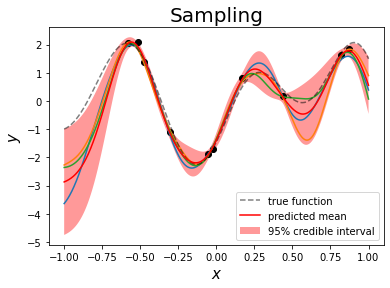

In [9]:
plt.title("Sampling",fontsize=20)
plt.plot(x[observed], y[observed], "o", color="k")
for smp in sample:
    plt.plot(x[:,0], smp)
plt.plot(x,f,"--k",label="true function",alpha=0.5)
plt.plot(x, mean, "r", label="predicted mean",alpha=1)
plt.fill_between(x[:,0], mean[:,0]+2*np.sqrt(var[:,0]), mean[:,0]-2*np.sqrt(var[:,0]), facecolor="r", alpha=0.4,label="95% credible interval")
plt.xlabel("$x$",fontsize=15)
plt.ylabel("$y$",fontsize=15)
plt.legend(loc="lower right")
plt.show()